In [78]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.preprocessing import PolynomialFeatures

In [59]:
file_path = r'C:\Users\DELL\Desktop\Spatial Assignment 2\2nd_Assignment-20231228\数据准备\电力预测\Indonesia data.csv'
data = pd.read_csv(file_path)

In [60]:
years = data['Year'].values
gdp_per_capita = data['GDP per capita (current US$)'].values
population = data['Population'].values
electric_consumption_per_capita = data['Electric power consumption (kWh per capita)'].values

In [61]:
def exp_growth(x, a, b, c):
    return a * np.exp(b * (x - 1971)) + c

In [65]:
pop_exp_params, _ = curve_fit(exp_growth, years, population, maxfev=10000)

In [66]:
future_years = np.arange(1971, 2031)

In [80]:
poly = PolynomialFeatures(degree=2)
X = years.reshape(-1, 1)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, gdp_per_capita)

LinearRegression()

In [81]:
X_future = future_years.reshape(-1, 1)
X_future_poly = poly.fit_transform(X_future)
predicted_gdp_per_capita = poly_reg.predict(X_future_poly)

In [82]:
def plot_prediction(years, historical_data, future_years, predicted_data, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.scatter(years, historical_data, color='blue', label='Historical Data')
    plt.plot(future_years, predicted_data, color='red', label='Predicted Data')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()


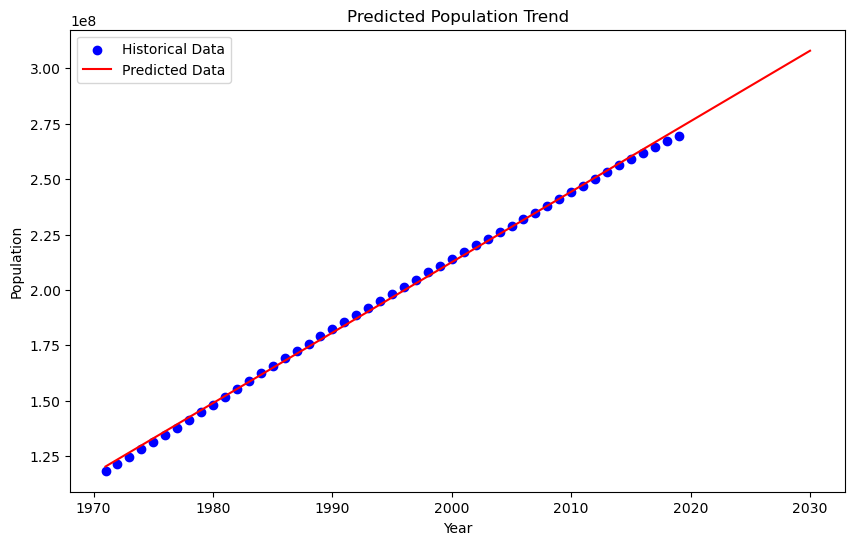

In [83]:
plot_prediction(years, population, future_years, predicted_population, 
                'Predicted Population Trend', 'Population')

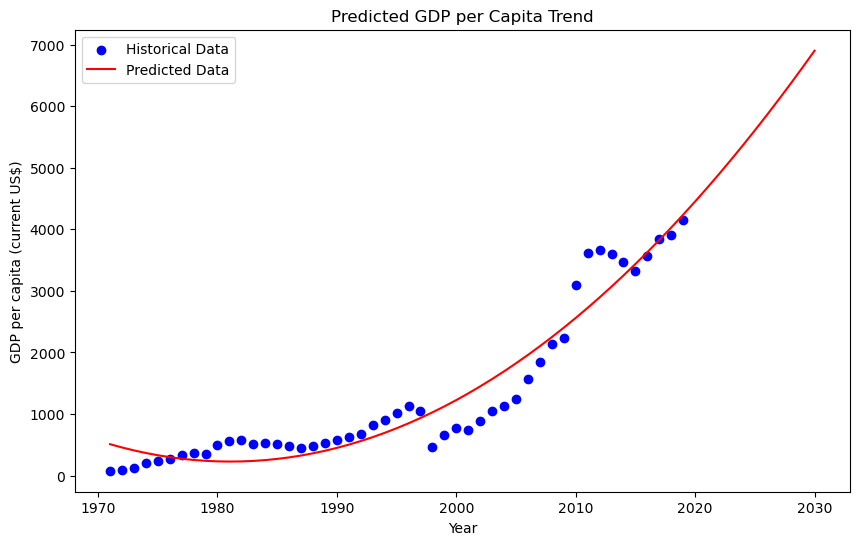

In [84]:
plot_prediction(years, gdp_per_capita, future_years, predicted_gdp_per_capita, 
                'Predicted GDP per Capita Trend', 'GDP per capita (current US$)')

In [85]:
electric_model = LinearRegression()
electric_model.fit(data[['GDP per capita (current US$)']], electric_consumption_per_capita)

LinearRegression()

In [86]:
predicted_electric_consumption = electric_model.predict(predicted_gdp_per_capita.reshape(-1, 1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


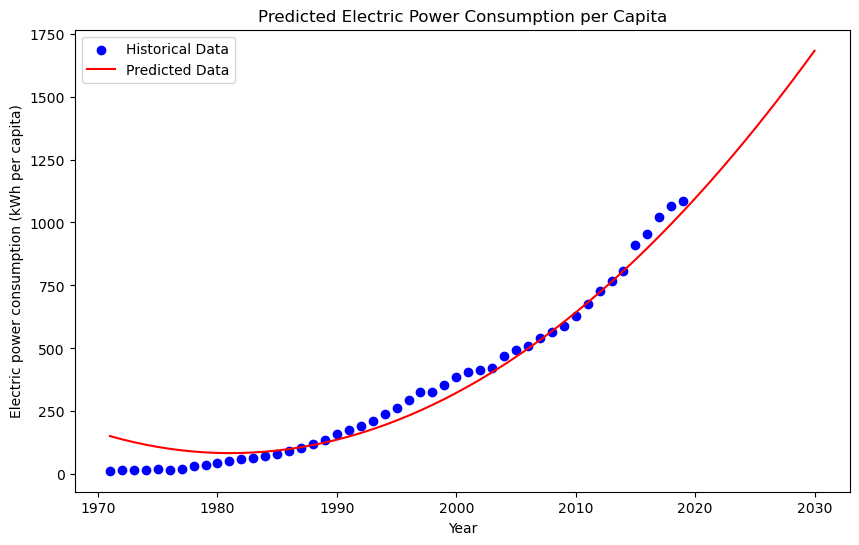

In [87]:
plot_prediction(years, electric_consumption_per_capita, future_years, predicted_electric_consumption, 
                'Predicted Electric Power Consumption per Capita', 'Electric power consumption (kWh per capita)')

In [88]:
 total_electricity_2030 = predicted_electric_consumption[-1] * predicted_population_2030

print("total_electricity_2030：", total_electricity_2030)

total_electricity_2030： 518028785756.0588


In [95]:
print("预测2030年的人口数：", predicted_population_2030)

预测2030年的人口数： 307975961.82092285
